# Assignment 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [2]:
dataset = pd.read_csv('Advertising.csv')
print(dataset.shape)
print(dataset.head(5))

(200, 5)
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [3]:
dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [4]:
t = dataset.iloc[:,4]
t

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

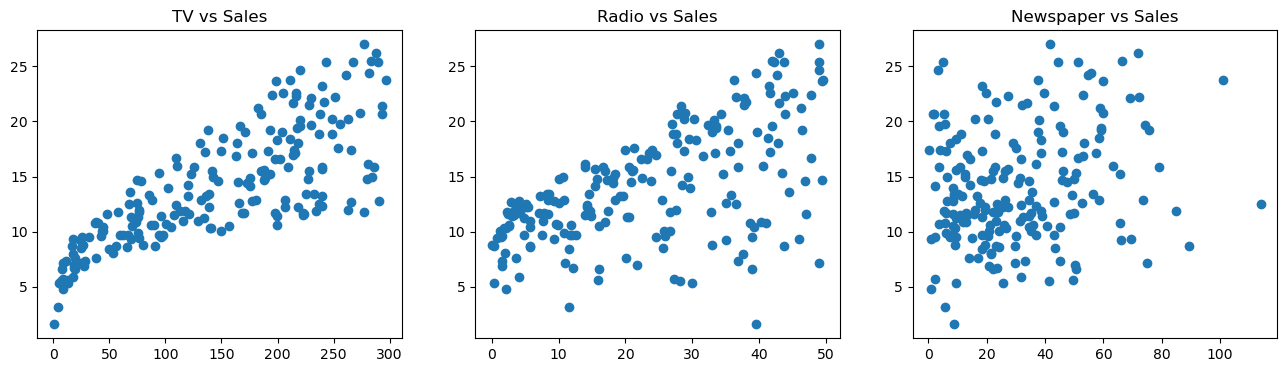

In [5]:
plt.figure(figsize=(16,4))
plt.subplot(131)
plt.gca().set_title('TV vs Sales')
plt.scatter(dataset.iloc[:,1], dataset.iloc[:,4])
plt.subplot(132)
plt.gca().set_title('Radio vs Sales')
plt.scatter(dataset.iloc[:,2], dataset.iloc[:,4])
plt.subplot(133)
plt.gca().set_title('Newspaper vs Sales')
plt.scatter(dataset.iloc[:,3], dataset.iloc[:,4])

In [6]:
X = dataset.iloc[:, 1:4]
y = dataset.iloc[:, 4]

In [7]:
lreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lreg.fit(X_train, y_train)

LinearRegression()

In [8]:
print(lreg.coef_)
print(lreg.intercept_)

[ 0.04458402  0.19649703 -0.00278146]
2.9948930304953283


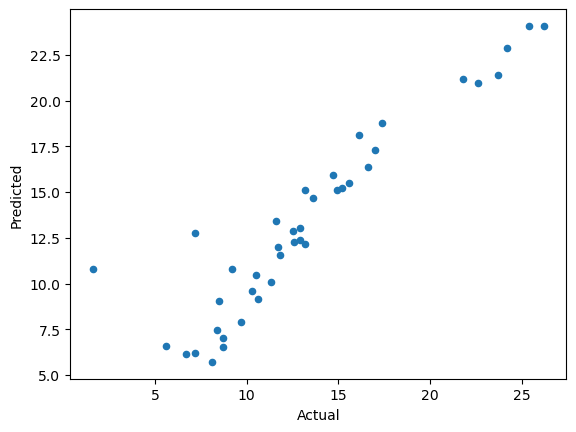

In [9]:
y_pred = lreg.predict(X_test)
df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
ax1 = df.plot.scatter(x="Actual", y='Predicted')

In [10]:
y_pred.shape

(40,)

In [11]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     505.4
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           4.23e-80
Time:                        13:52:15   Log-Likelihood:                -297.29
No. Observations:                 160   AIC:                             602.6
Df Residuals:                     156   BIC:                             614.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9949      0.330      9.076      0.0